In [1]:
import pandas as pd
import numpy as np
#import geopandas as gpd

pd.set_option('display.max_columns', None)

In [2]:
def print_col_null(df, type="category"):

    not_nan_counts = df.notna().all(axis=1).mean()

    print(
        f"share of not nan rows: {not_nan_counts:.2%}"
    )

    if type == "category":
        print(
            df.value_counts()
        )
        
    elif type == "numeric":
        print(
            df.describe()
        )

In [3]:
df = pd.read_parquet('data/transactions.parquet')
df.shape

(1609882, 49)

In [4]:
df.head()

,transaction_id,procedure_id,trans_group_id,trans_group_ar,trans_group_en,procedure_name_ar,procedure_name_en,instance_date,property_type_id,property_type_ar,property_type_en,property_sub_type_id,property_sub_type_ar,property_sub_type_en,property_usage_ar,property_usage_en,reg_type_id,reg_type_ar,reg_type_en,area_id,area_name_ar,area_name_en,building_name_ar,building_name_en,project_number,project_name_ar,project_name_en,master_project_en,master_project_ar,nearest_landmark_ar,nearest_landmark_en,nearest_metro_ar,nearest_metro_en,nearest_mall_ar,nearest_mall_en,rooms_ar,rooms_en,has_parking,procedure_area,actual_worth,meter_sale_price,rent_value,meter_rent_price,no_of_parties_role_1,no_of_parties_role_2,no_of_parties_role_3,lat,lng,CNAME_E
0,3-9-2006-163,9,3,هبات,Gifts,هبه,Grant,16-10-2006,4,فيلا,Villa,NaN,None,None,سكني,Residential,1,العقارات القائمة,Existing Properties,278,منخول,MANKHOOL,None,None,NaN,None,None,None,None,برج خليفة,Burj Khalifa,محطة مترو بنك أبوظبي التجاري,ADCB Metro Station,مول دبي,Dubai Mall,None,None,0,3162.42,12000000.0,3794.56,NaN,NaN,3.0,1.0,0.0,25.245513,55.294135,MANKHOOL
1,3-9-2019-2944,9,3,هبات,Gifts,هبه,Grant,13-11-2019,1,أرض,Land,NaN,None,None,سكني,Residential,1,العقارات القائمة,Existing Properties,278,منخول,MANKHOOL,None,None,NaN,None,None,None,None,برج خليفة,Burj Khalifa,محطة مترو بنك أبوظبي التجاري,ADCB Metro Station,مول دبي,Dubai Mall,None,None,0,209.09,916659.0,4384.04,NaN,NaN,2.0,4.0,0.0,25.245513,55.294135,MANKHOOL
2,2-13-2001-690,13,2,رهون,Mortgages,تسجيل رهن,Mortgage Registration,20-08-2001,2,مبنى,Building,NaN,None,None,سكني / تجاري,Residential / Commercial,1,العقارات القائمة,Existing Properties,388,عود ميثا,OUD METHA,None,None,NaN,None,None,None,None,برج خليفة,Burj Khalifa,محطة مترو عود ميثاء,Oud Metha Metro Station,مول دبي,Dubai Mall,None,None,0,1337.80,4519342.0,3378.19,NaN,NaN,1.0,1.0,0.0,25.239126,55.312967,OUD METHA
3,2-13-2020-9477,13,2,رهون,Mortgages,تسجيل رهن,Mortgage Registration,30-11-2020,2,مبنى,Building,NaN,None,None,سكني,Residential,1,العقارات القائمة,Existing Properties,276,البدع,AL BADA,None,None,NaN,None,None,None,None,برج خليفة,Burj Khalifa,محطة مترو المركز التجاري,Trade Centre Metro Station,مول دبي,Dubai Mall,None,None,0,278.71,2500000.0,8969.90,NaN,NaN,1.0,1.0,0.0,25.224727,55.268742,AL BADA'
4,2-13-1999-532,13,2,رهون,Mortgages,تسجيل رهن,Mortgage Registration,26-04-1999,4,فيلا,Villa,NaN,None,None,سكني,Residential,1,العقارات القائمة,Existing Properties,276,البدع,AL BADA,None,None,NaN,None,None,None,None,برج خليفة,Burj Khalifa,محطة مترو المركز التجاري,Trade Centre Metro Station,مول دبي,Dubai Mall,None,None,0,3626.93,1900000.0,523.86,NaN,NaN,1.0,1.0,0.0,25.224727,55.268742,AL BADA'


In [5]:
cols = ["trans_group_id", "trans_group_en"]

print_col_null(df[cols])

share of not nan rows: 100.00%
trans_group_id  trans_group_en
1               Sales             1230543
2               Mortgages          319771
3               Gifts               59568
Name: count, dtype: int64


In [6]:
cols = ["property_usage_en"]

print_col_null(df[cols])

share of not nan rows: 100.00%
property_usage_en                    
Residential                              1360501
Commercial                                159743
Hospitality                                42081
Other                                      19099
Residential / Commercial                   14773
Multi-Use                                   6021
Industrial                                  5291
Agricultural                                1129
Industrial / Commercial                      690
Storage                                      487
Industrial / Commercial / Residential         67
Name: count, dtype: int64


In [7]:
masks = [
    df["trans_group_en"] == "Sales",
    df["property_usage_en"] == "Residential"
]

for mask in masks:
    df = df.loc[mask]

df.shape

(1035986, 49)

instance_date
2025    169258
2024    159199
2023    113393
2022     78431
2021     51070
2020     28846
2019     32513
2018     26975
2017     37410
2016     35057
2015     34533
2014     45179
2013     52408
2012     28746
2011     23577
2010     29368
2009     52563
2008     19331
2007      7685
2006      1915
Name: count, dtype: int64

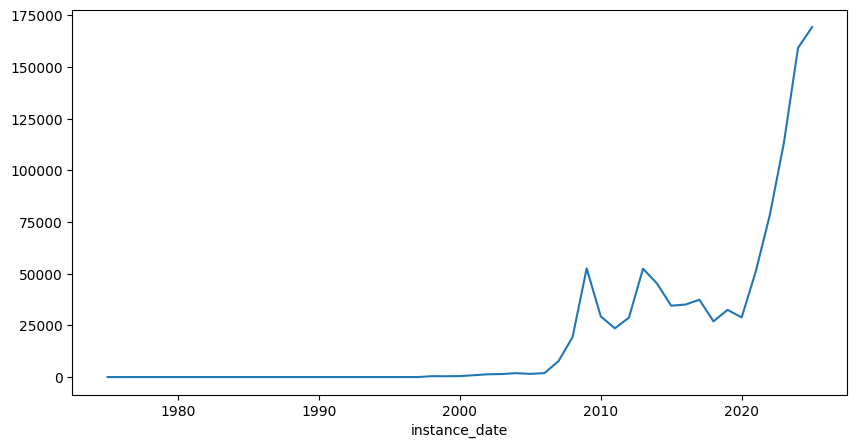

In [8]:
df["instance_date"] = pd.to_datetime(
    df["instance_date"],
    errors="coerce",
    dayfirst=True
)

df["instance_date"].dt.year.value_counts().sort_index().plot(kind="line", figsize=(10, 5))

df["instance_date"].dt.year.value_counts().sort_index(ascending=False).head(20)

In [9]:
mask = df["instance_date"].dt.year >= 2008,

df = df.loc[mask]

df.shape

(1017857, 49)

In [10]:
cols = ["procedure_id", "procedure_name_en"]

assert (df.groupby(cols[0])[cols[1]].nunique() == 1).all()
assert (df.groupby(cols[1])[cols[0]].nunique() == 1).all()

print_col_null(df[cols])

share of not nan rows: 100.00%
procedure_id  procedure_name_en                         
102           Sell - Pre registration                       497761
11            Sell                                          382839
41            Delayed Sell                                   81146
110           Lease to Own Registration                      25356
45            Sell Development                                9316
133           Development Registration                        9012
851           Development Registration Pre-Registration       3708
107           Lease to Own Registration Pre-Registration      3165
460           Sale On Payment Plan                            1905
95            Delayed Development                             1237
361           Delayed Lease to Own Registration                865
371           Lease Development Registration                   462
814           Lease to Own on Development Registration         295
715           Delayed Sell Lease to Own R

In [11]:
cols = ["property_type_id", "property_type_en"]

print_col_null(df[cols])

share of not nan rows: 100.00%
property_type_id  property_type_en
3                 Unit                832190
4                 Villa               155661
1                 Land                 26236
2                 Building              3770
Name: count, dtype: int64


In [12]:
cols = ["reg_type_id", "reg_type_en"]

print_col_null(df[cols])

share of not nan rows: 100.00%
reg_type_id  reg_type_en        
1            Existing Properties    513016
0            Off-Plan Properties    504841
Name: count, dtype: int64


In [13]:
cols = ["area_name_en"]

print_col_null(df[cols])

print(
    df[["area_name_en"]].value_counts().describe()
)

share of not nan rows: 100.00%
area_name_en          
MARSA DUBAI               95898
AL BARSHA SOUTH FOURTH    79810
BUSINESS BAY              55167
BURJ KHALIFA              51782
AL THANYAH FIFTH          48142
                          ...  
AL YELAYISS 4                 2
SAIH SHUAIB 3                 2
WADI AL AMARDI                1
AL ROWAIYAH FIRST             1
MUHAISANAH SECOND             1
Name: count, Length: 154, dtype: int64
count      154.000000
mean      6609.461039
std      14227.149998
min          1.000000
25%         53.500000
50%        395.000000
75%       6071.250000
max      95898.000000
Name: count, dtype: float64


In [14]:
cols = ["rooms_en"]

print_col_null(df[cols])

share of not nan rows: 91.21%
rooms_en   
1 B/R          354257
2 B/R          227393
Studio         182286
3 B/R          118365
4 B/R           39749
5 B/R            4240
PENTHOUSE        1029
Single Room       682
6 B/R             267
7 B/R              50
Shop               29
9 B/R               3
Office              3
8 B/R               2
Name: count, dtype: int64


In [15]:
cols = ["has_parking"]

print_col_null(df[cols])

share of not nan rows: 100.00%
has_parking
1              776539
0              241318
Name: count, dtype: int64


In [21]:
cols = ["nearest_landmark_en"]

print_col_null(df[cols])

share of not nan rows: 81.50%
nearest_landmark_en              
Sports City Swimming Academy         225965
Burj Al Arab                         148140
Downtown Dubai                       121656
Motor City                            87657
IMG World Adventures                  76491
Burj Khalifa                          51414
Dubai International Airport           42608
Expo 2020 Site                        29690
Dubai Cycling Course                  20290
Global Village                         8991
Al Makhtoum International Airport      5908
Dubai Parks and Resorts                5776
Hamdan Sports Complex                  4955
Jabel Ali                                 5
Name: count, dtype: int64


In [22]:
cols = ["nearest_metro_en"]

print_col_null(df[cols])

share of not nan rows: 70.76%
nearest_metro_en                    
Buj Khalifa Dubai Mall Metro Station    81722
Dubai Internet City                     73734
Nakheel Metro Station                   69358
Business Bay Metro Station              63332
Rashidiya Metro Station                 54364
Damac Properties                        48824
Jumeirah Lakes Towers                   35584
Sharaf Dg Metro Station                 34637
First Abu Dhabi Bank Metro Station      32441
Harbour Tower                           24064
Creek Metro Station                     21195
Jumeirah Beach Residency                20414
Palm Jumeirah                           18077
Jumeirah Beach Resdency                 17660
Mina Seyahi                             17280
Ibn Battuta Metro Station               16081
Marina Towers                           12864
Marina Mall Metro Station                9406
Noor Bank Metro Station                  8720
Dubai Marina                             7782
Al Jadaf Metr

In [23]:
cols = ["nearest_mall_en"]

print_col_null(df[cols])

share of not nan rows: 70.24%
nearest_mall_en     
Marina Mall             288978
Dubai Mall              181142
Mall of the Emirates    118555
City Centre Mirdif       76842
Ibn-e-Battuta Mall       49416
Name: count, dtype: int64


In [16]:
mask = ~np.isclose(
    round(df["actual_worth"] / df["procedure_area"], 2),
    df["meter_sale_price"],
    equal_nan=True
)

calculated_price = df[mask]["actual_worth"] / df[mask]["procedure_area"]
reported_price = df[mask]["meter_sale_price"]

abs(
    (calculated_price - reported_price) / reported_price
).describe()

count    262.000000
mean       0.000078
std        0.000538
min        0.000005
25%        0.000012
50%        0.000022
75%        0.000035
max        0.008421
dtype: float64

In [17]:

cols = ["procedure_area"] #sqm

print_col_null(df[cols], type="numeric")

share of not nan rows: 100.00%
       procedure_area
count    1.017857e+06
mean     2.740568e+02
std      3.209705e+04
min      1.000000e-02
25%      6.409000e+01
50%      9.064000e+01
75%      1.573200e+02
max      2.000081e+07


In [18]:
cols = ["actual_worth"] #AED

print_col_null(df[cols], type="numeric")

share of not nan rows: 100.00%
       actual_worth
count  1.017857e+06
mean   2.125722e+06
std    5.324236e+06
min    1.000000e+00
25%    7.270000e+05
50%    1.300000e+06
75%    2.334790e+06
max    2.547202e+09


In [19]:
cols = ["meter_sale_price"] #AED

print_col_null(df[cols], type="numeric")

share of not nan rows: 100.00%
       meter_sale_price
count      1.017857e+06
mean       1.584805e+04
std        1.184900e+05
min        0.000000e+00
25%        8.634810e+03
50%        1.302690e+04
75%        1.892134e+04
max        8.125000e+07


In [20]:
df.head()

,transaction_id,procedure_id,trans_group_id,trans_group_ar,trans_group_en,procedure_name_ar,procedure_name_en,instance_date,property_type_id,property_type_ar,property_type_en,property_sub_type_id,property_sub_type_ar,property_sub_type_en,property_usage_ar,property_usage_en,reg_type_id,reg_type_ar,reg_type_en,area_id,area_name_ar,area_name_en,building_name_ar,building_name_en,project_number,project_name_ar,project_name_en,master_project_en,master_project_ar,nearest_landmark_ar,nearest_landmark_en,nearest_metro_ar,nearest_metro_en,nearest_mall_ar,nearest_mall_en,rooms_ar,rooms_en,has_parking,procedure_area,actual_worth,meter_sale_price,rent_value,meter_rent_price,no_of_parties_role_1,no_of_parties_role_2,no_of_parties_role_3,lat,lng,CNAME_E
5,1-11-2025-36691,11,1,مبايعات,Sales,بيع,Sell,2025-09-04,2,مبنى,Building,NaN,None,None,سكني,Residential,1,العقارات القائمة,Existing Properties,271,الكرامه,AL KARAMA,None,None,NaN,None,None,None,None,برج خليفة,Burj Khalifa,محطة مترو بنك أبوظبي التجاري,ADCB Metro Station,مول دبي,Dubai Mall,None,None,0,211.37,7000000.0,33117.28,NaN,NaN,1.0,2.0,0.0,25.248920,55.306055,AL KARAMA
10,1-11-2023-24638,11,1,مبايعات,Sales,بيع,Sell,2023-08-18,2,مبنى,Building,NaN,None,None,سكني,Residential,1,العقارات القائمة,Existing Properties,271,الكرامه,AL KARAMA,None,None,NaN,None,None,None,None,برج خليفة,Burj Khalifa,محطة مترو بنك أبوظبي التجاري,ADCB Metro Station,مول دبي,Dubai Mall,None,None,0,211.35,5000000.0,23657.44,NaN,NaN,14.0,1.0,0.0,25.248920,55.306055,AL KARAMA
21,1-11-2023-19347,11,1,مبايعات,Sales,بيع,Sell,2023-06-22,1,أرض,Land,NaN,None,None,سكني,Residential,1,العقارات القائمة,Existing Properties,266,السطوه,AL SATWA,None,None,NaN,None,None,None,None,برج خليفة,Burj Khalifa,محطة مترو المركز التجاري,Trade Centre Metro Station,مول دبي,Dubai Mall,None,None,0,195.10,4000000.0,20502.31,NaN,NaN,4.0,3.0,0.0,25.219370,55.272887,AL SATWA
24,1-11-2013-2580,11,1,مبايعات,Sales,بيع,Sell,2013-01-28,1,أرض,Land,NaN,None,None,سكني,Residential,1,العقارات القائمة,Existing Properties,264,ند الحمر,NAD AL HAMAR,None,None,NaN,None,None,None,None,مطار دبي الدولي,Dubai International Airport,محطة مترو الراشدية,Rashidiya Metro Station,سيتي سنتر مردف,City Centre Mirdif,None,None,0,1428.38,2921250.0,2045.15,NaN,NaN,10.0,2.0,0.0,25.200432,55.386264,NADD AL HAMAR
30,1-11-2016-4132,11,1,مبايعات,Sales,بيع,Sell,2016-04-11,4,فيلا,Villa,NaN,None,None,سكني,Residential,1,العقارات القائمة,Existing Properties,234,هور العنز شرق,HOR AL ANZ EAST,None,None,NaN,None,None,None,None,مطار دبي الدولي,Dubai International Airport,محطة مترو أبو هيل,Abu Hail Metro Station,None,None,None,None,0,455.22,3900000.0,8567.29,NaN,NaN,1.0,1.0,0.0,25.283091,55.351682,HOR AL ANZ EAST


In [25]:
cols_to_keep = [
    "transaction_id",
    "instance_date",
    "area_name_en",
    "CNAME_E",
    "procedure_name_en",
    "property_type_en",
    "rooms_en",
    "has_parking",
    "nearest_landmark_en",
    "nearest_metro_en",
    "nearest_mall_en",
    "procedure_area",
    "actual_worth",
    "meter_sale_price"
]

df = df[cols_to_keep]

df.shape

(1017857, 14)

In [26]:
df.head()

,transaction_id,instance_date,area_name_en,CNAME_E,procedure_name_en,property_type_en,rooms_en,has_parking,nearest_landmark_en,nearest_metro_en,nearest_mall_en,procedure_area,actual_worth,meter_sale_price
5,1-11-2025-36691,2025-09-04,AL KARAMA,AL KARAMA,Sell,Building,None,0,Burj Khalifa,ADCB Metro Station,Dubai Mall,211.37,7000000.0,33117.28
10,1-11-2023-24638,2023-08-18,AL KARAMA,AL KARAMA,Sell,Building,None,0,Burj Khalifa,ADCB Metro Station,Dubai Mall,211.35,5000000.0,23657.44
21,1-11-2023-19347,2023-06-22,AL SATWA,AL SATWA,Sell,Land,None,0,Burj Khalifa,Trade Centre Metro Station,Dubai Mall,195.10,4000000.0,20502.31
24,1-11-2013-2580,2013-01-28,NAD AL HAMAR,NADD AL HAMAR,Sell,Land,None,0,Dubai International Airport,Rashidiya Metro Station,City Centre Mirdif,1428.38,2921250.0,2045.15
30,1-11-2016-4132,2016-04-11,HOR AL ANZ EAST,HOR AL ANZ EAST,Sell,Villa,None,0,Dubai International Airport,Abu Hail Metro Station,None,455.22,3900000.0,8567.29


In [27]:
df.to_parquet('data/residential_sales.parquet', index=False)